In [1156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training Data

In [1157]:
train_df = pd.read_csv('train.csv')

In [1158]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1159]:
train_df.shape

(1460, 81)

# Missing data

In [1160]:
train_df = train_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [1161]:
train_df.columns[train_df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [1162]:
np.dtype(train_df['LotFrontage'])

dtype('float64')

In [1163]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

In [1164]:
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])

In [1165]:
train_df['MasVnrType'].dtype

dtype('O')

In [1166]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])

In [1167]:
train_df['MasVnrArea'].dtype

dtype('float64')

In [1168]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [1169]:
train_df['GarageType'].dtype

dtype('O')

In [1170]:
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])

In [1171]:
train_df['GarageFinish'].dtype

dtype('O')

In [1172]:
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])

In [1173]:
train_df['GarageYrBlt'].dtype

dtype('float64')

In [1174]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [1175]:
train_df['GarageCond'].dtype

dtype('O')

In [1176]:
train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])

In [1177]:
train_df['GarageQual'].dtype

dtype('O')

In [1178]:
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])

In [1179]:
train_df['BsmtCond'].dtype

dtype('O')

In [1180]:
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])

In [1181]:
train_df['BsmtExposure'].dtype

dtype('O')

In [1182]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])

In [1183]:
train_df['BsmtFinType1'].dtype

dtype('O')

In [1184]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])

In [1185]:
train_df['BsmtFinType2'].dtype

dtype('O')

In [1186]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])

In [1187]:
train_df['Electrical'].dtype

dtype('O')

In [1188]:
train_df['Electrical'].isnull().sum()

1

In [1189]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [1190]:
train_df['FireplaceQu'].isnull().sum()

690

In [1191]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])

In [1192]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [1193]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

<AxesSubplot:>

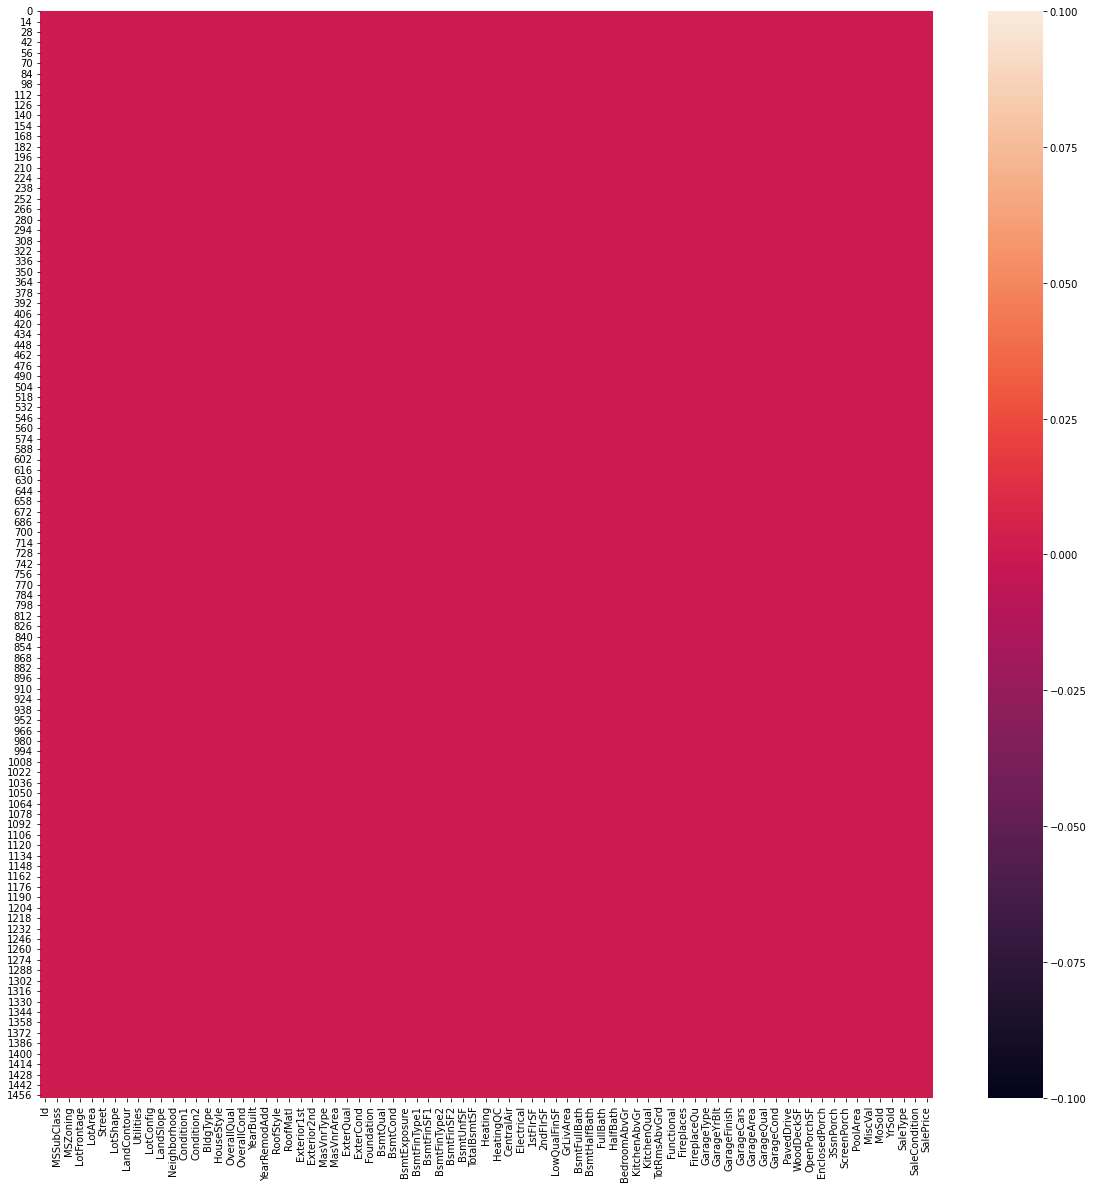

In [1194]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.isnull())

# Testing Data

In [1195]:
test_df = pd.read_csv('test.csv')

In [1196]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1197]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Handle the missing data

In [1198]:
test_df = test_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [1199]:
test_df.columns[test_df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [1200]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 76, dtype: int64

In [1201]:
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean())
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])

In [1202]:
test_df['MSZoning'].dtype

dtype('O')

In [1203]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [1204]:
test_df['Utilities'].dtype

dtype('O')

In [1205]:
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])

In [1206]:
test_df['Exterior1st'].dtype

dtype('O')

In [1207]:
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])

In [1208]:
test_df['Exterior2nd'].dtype

dtype('O')

In [1209]:
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])

In [1210]:
test_df['BsmtFinSF1'].dtype

dtype('float64')

In [1211]:
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())

In [1212]:
test_df['BsmtFinSF2'].dtype

dtype('float64')

In [1213]:
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())

In [1214]:
test_df['BsmtUnfSF'].dtype

dtype('float64')

In [1215]:
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())

In [1216]:
test_df['TotalBsmtSF'].dtype

dtype('float64')

In [1217]:
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())

In [1218]:
test_df['BsmtFullBath'].dtype

dtype('float64')

In [1219]:
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean())

In [1220]:
test_df['BsmtHalfBath'].dtype

dtype('float64')

In [1221]:
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean())

In [1222]:
test_df['KitchenQual'].dtype

dtype('O')

In [1223]:
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])

In [1224]:
test_df['Functional'].dtype

dtype('O')

In [1225]:
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])

In [1226]:
test_df['GarageCars'].dtype

dtype('float64')

In [1227]:
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())

In [1228]:
test_df['GarageArea'].dtype

dtype('float64')

In [1229]:
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [1230]:
test_df['SaleType'].dtype

dtype('O')

In [1231]:
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [1232]:
test_df.columns[test_df.isnull().any()]

Index([], dtype='object')

<AxesSubplot:>

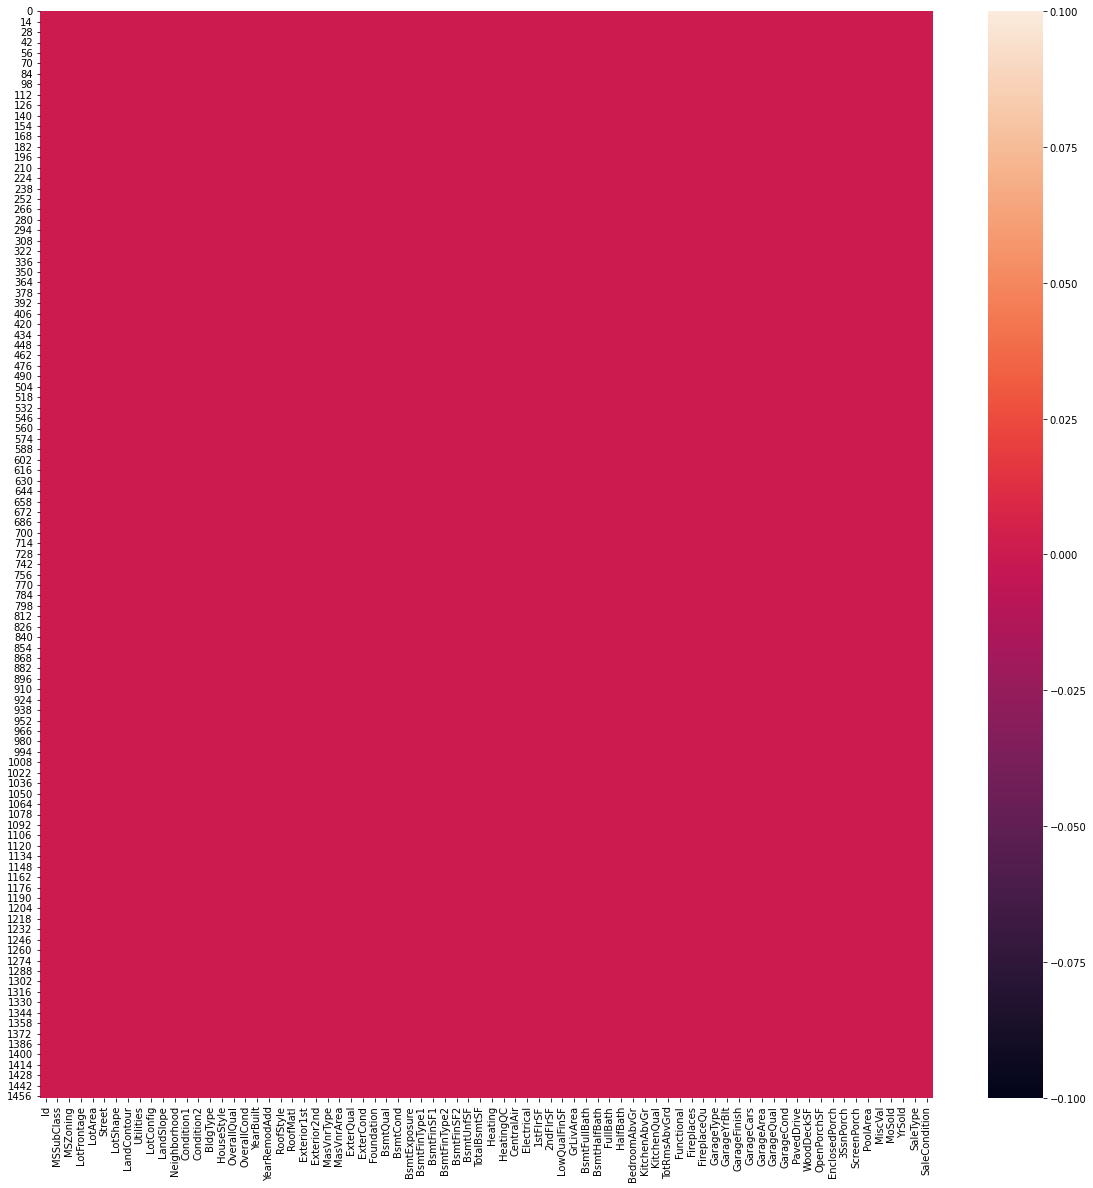

In [1233]:
plt.figure(figsize=(20,20))
sns.heatmap(test_df.isnull())

# Concatenate Test and Training data

In [1234]:
df = pd.concat([train_df,test_df], axis=0)

In [1235]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [1236]:
df.shape

(2919, 77)

In [1237]:
df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       130
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 77, dtype: int64

# Numeric columns

In [1238]:
num_cols = df._get_numeric_data().columns

In [1239]:
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [1240]:
len(num_cols)

38

# Categorical Columns

In [1241]:
cat_cols = df.select_dtypes(include=['category','O'])

In [1242]:
print(cat_cols.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [1243]:
cat_cols = cat_cols.columns

In [1244]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1245]:
len(cat_cols)

39

In [1246]:
def dum_cols(cat_cols_df, df):
    df1=df
    for items in cat_cols_df:
        dummies = pd.get_dummies(df1[items], drop_first=True)
        df1 = pd.concat([df1,dummies], axis=1)
        df1 = df1.drop([items], axis=1)
    return df1


In [1247]:
df = dum_cols(cat_cols, df)

In [1248]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


In [1249]:
df = df.loc[:,~df.columns.duplicated()]

In [1250]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0


# Preparing data set

In [1251]:
df_train=df.iloc[:1460,:]
df_test=df.iloc[1460:,:]

In [1252]:
len(df_test)

1459

In [1253]:
len(df_train)

1460

In [1254]:
df_test = df_test.drop(['SalePrice'],axis=1)

In [1255]:

X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [1256]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

Explanation of relevant parameters for this kernel.

booster: Select the type of model to run at each iteration
gbtree: tree-based models
gblinear: linear models
nthread: default to maximum number of threads available if not set
objective: This defines the loss function to be minimized
Parameters for controlling speed

subsample: Denotes the fraction of observations to be randomly samples for each tree
colsample_bytree: Subsample ratio of columns when constructing each tree.
n_estimators: Number of trees to fit.
Important parameters which control overfiting

learning_rate: Makes the model more robust by shrinking the weights on each step
max_depth: The maximum depth of a tree.
min_child_weight: Defines the minimum sum of weights of all observations required in a child.

In [1257]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.1, 0.2],
        'max_depth': [5, 7],
        'min_child_weight': [3, 5],
        'subsample': [0.6, 0.7],
        'colsample_bytree': [0.6, 0.7],
        'n_estimators' : [200, 300],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           scoring = 'neg_root_mean_squared_error',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

run once

In [1258]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 300,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [1329]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.6,
        learning_rate = 0.1,
        max_depth = 7,
        min_child_weight = 3,
        n_estimators = 300,
        subsample = 0.7)

# otak atik min child weight

In [1330]:
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))

In [1331]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1332]:
y_pred = xgb_model.predict(df_test)

In [1333]:
# subm_df = pd.read_csv('../input/sample_submission.csv')
# subm_df['PredictedLogRevenue'] = <your prediction array>
# subm_df.to_csv('Subm_1.csv', index=False)

In [1334]:
sample_submission_df = pd.read_csv('sample_submission.csv')

In [1335]:
sample_submission_df['SalePrice'] = y_pred
sample_submission_df.to_csv('submission.csv', index=False)

In [1336]:
sample_submission_df

,Id,SalePrice
0,1461,126964.585938
1,1462,154066.328125
2,1463,191995.625000
3,1464,197839.312500
4,1465,180799.453125
...,...,...
1454,2915,81370.593750
1455,2916,76276.429688
1456,2917,170779.437500
1457,2918,109806.953125


In [1337]:
submission_df = pd.read_csv('submission.csv')

In [1338]:
submission_df

,Id,SalePrice
0,1461,126964.586
1,1462,154066.330
2,1463,191995.620
3,1464,197839.310
4,1465,180799.450
...,...,...
1454,2915,81370.590
1455,2916,76276.430
1456,2917,170779.440
1457,2918,109806.950
